In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
np.set_printoptions(threshold=300)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission
from implement import modeling
from preprocessing import dataprocessing, split_categories
from select_features import best_set_of_features
from other import plot_train_test
import math

## Load and process data

Load data

In [24]:
y_train, x_train, ids_train = load_csv_data('train.csv', sub_sample=False)
_,      x_test,   ids_test  = load_csv_data('test.csv',  sub_sample=False)

Create categories

In [25]:
cat_0_tri, cat_1_tri, cat_2_tri, cat_3_tri, idx_0_tr, idx_1_tr, idx_2_tr, idx_3_tr = split_categories(x_train)
cat_0_tei, cat_1_tei, cat_2_tei, cat_3_tei, idx_0_te, idx_1_te, idx_2_te, idx_3_te = split_categories(x_test)

y_train_0 = y_train[idx_0_tr]
y_train_1 = y_train[idx_1_tr] 
y_train_2 = y_train[idx_2_tr]
y_train_3 = y_train[idx_3_tr]

Preprocess the data, create features

In [26]:
trx_0, tex_0= dataprocessing(cat_0_tri,cat_0_tei,idx_0_tr,idx_0_te,deg0=9,adddegree0=1,sqrt0=1,comb0=1)

C:\Users\Yong Joon\MachineLearningProject1\preprocessing.py:114: RuntimeWarning: invalid value encountered in power
  out = np.where(tx <0 , -np.power(-tx,0.5), np.power(tx,0.5))


In [27]:
trx_1, tex_1= dataprocessing(cat_1_tri,cat_1_tei,idx_1_tr,idx_1_te,deg0=9,adddegree0=1,sqrt0=1,comb0=1)

C:\Users\Yong Joon\MachineLearningProject1\preprocessing.py:114: RuntimeWarning: invalid value encountered in power
  out = np.where(tx <0 , -np.power(-tx,0.5), np.power(tx,0.5))


In [28]:
trx_2, tex_2= dataprocessing(cat_2_tri,cat_2_tei,idx_2_tr,idx_2_te,deg0=9,adddegree0=1,sqrt0=1,comb0=1)

C:\Users\Yong Joon\MachineLearningProject1\preprocessing.py:114: RuntimeWarning: invalid value encountered in power
  out = np.where(tx <0 , -np.power(-tx,0.5), np.power(tx,0.5))


In [29]:
trx_3, tex_3= dataprocessing(cat_3_tri,cat_3_tei,idx_3_tr,idx_3_te,deg0=9,adddegree0=1,sqrt0=1,comb0=1)

C:\Users\Yong Joon\MachineLearningProject1\preprocessing.py:114: RuntimeWarning: invalid value encountered in power
  out = np.where(tx <0 , -np.power(-tx,0.5), np.power(tx,0.5))


In [44]:
from proj1_helpers import load_csv_data
from implementations import ridge_regression, compute_loss_ridge
from implement import modeling
from other import accuracy
import numpy as np 
import math

def first_best(x_train, y_train,lambda_0):
    #print("First best")

    nb_fold = 5
    nb_elem = math.floor(x_train.shape[0]/nb_fold)

    losses = []
    for feat in range(x_train.shape[1]):     
        loss = []
        for k in range(nb_fold):
            x_valid_k = x_train[k*nb_elem:(k+1)*nb_elem][:,feat:feat+1]
            y_valid_k = y_train[k*nb_elem:(k+1)*nb_elem]
            
            x_train_k = np.concatenate([  x_train[0:k*nb_elem][:,feat:feat+1], x_train[(k+1)*nb_elem:][:,feat:feat+1] ])
            y_train_k = np.concatenate([  y_train[0:k*nb_elem],    y_train[(k+1)*nb_elem:]    ]) 
                                        
            w, _ = ridge_regression(y_train_k, x_train_k, lambda_0)
            loss.append(compute_loss_ridge(y_valid_k, x_valid_k, w, lambda_0))

        mean_loss = np.mean(loss)

        losses.append(mean_loss)

    min_feat = np.argmin(losses)
    min_loss = losses[min_feat]

    #print("Feature {} has the minimum loss of {}".format(min_feat, min_loss))

    return min_feat




def best_feature(x_train, y_train, nb_features_already, features_idx,lambda_0):

    nb_fold = 5
    nb_elem = math.floor(x_train.shape[0]/nb_fold)

    losses = []
    for feat in range(nb_features_already, x_train.shape[1]): 
        if(feat not in features_idx):
            x_train_cross = np.concatenate([x_train[:,features_idx], x_train[:, feat:feat+1]], axis = 1)
            #print("Shape of x_train {}".format(x_train.shape))
            loss = []
            #acc = []
            for k in range(nb_fold):
                x_valid_k = x_train_cross[k*nb_elem:(k+1)*nb_elem][:]
                y_valid_k = y_train[k*nb_elem:(k+1)*nb_elem]
                
                x_train_k = np.concatenate([  x_train_cross[0:k*nb_elem][:], x_train_cross[(k+1)*nb_elem:][:] ])
                y_train_k = np.concatenate([  y_train[0:k*nb_elem],    y_train[(k+1)*nb_elem:]    ]) 
                                            
                w, _ = ridge_regression(y_train_k, x_train_k, lambda_0)
                loss.append(compute_loss_ridge(y_valid_k, x_valid_k, w, lambda_0))

                #acc.append( accuracy(y_valid_k, x_valid_k, w) )

            #mean_acc = np.mean(acc)
            #print("mean accuracy is {}".format(mean_acc))
            #accuracies.append(mean_acc)
        
            mean_loss = np.mean(loss)
            #print("mean loss is {}".format(mean_loss))
            losses.append(mean_loss)
            
        elif(feat in features_idx):
            #print("feat in idx already")
            losses.append(1000)         # so high it will never be the min
    #max_feat = np.argmax(accuracies)
    #max_acc = accuracies[max_feat]
    #print("Feature {} has the max accuracy: {}".format(max_feat, max_acc))

    min_feat_rel = np.argmin(losses)
    print("min feature is {}".format(min_feat_rel))
    min_loss = losses[min_feat_rel]
    #print("Feature {} has the minimum loss of {}".format(min_feat, min_loss))
    min_feat = min_feat_rel + nb_features_already

    #using the accuracy would enable to break in the main loopwhen accuracy start decreasing but speed of algorithm is very affected. 
    #So keep loss and check afterwards where decrease
    return min_feat #max_feat, max_acc


def best_set_of_features(x_train, y_train):
    nb_fold = 5
    nb_crossvalid = 5
    
    nb_features_already = 0
    first_min_feat = first_best(x_train, y_train, lambda_0 = 0)
    #print("first_mean_feat {}",format(first_min_feat))

    features_idx = []
    features_idx.append(first_min_feat)
    
    lambdas = []
    _, lambda_best = modeling(x_train, y_train, num_intervals_lambda=10, nb_fold=60, nb_crossvalid=3, min_range=-2, max_range=0) 
    
    lambdas.append(lambda_best)
    
    accuracies = []
    
    for i in range(50):
        nb_features_already += 1

        feature = best_feature(x_train, y_train, nb_features_already, features_idx, lambda_best)
        
        x_train_modeling = np.concatenate([x_train[:,features_idx], x_train[:, feature:feature+1]], axis = 1)
        
        w_best, lambda_best = modeling(x_train_modeling, y_train, num_intervals_lambda=60, nb_fold=10, nb_crossvalid=3, min_range=-20, max_range=0) 
        lambdas.append(lambda_best)
        
        nb_elem = math.floor(x_train.shape[0]/nb_fold)
        acc = []
        for k in range(nb_crossvalid):
            x_valid_k = x_train[k*nb_elem:(k+1)*nb_elem][:]  
            y_valid_k = y_train[k*nb_elem:(k+1)*nb_elem]           
            x_train_k = np.concatenate([x_train[0:k*nb_elem][:], x_train[(k+1)*nb_elem:][:]])
            y_train_k = np.concatenate([y_train[0:k*nb_elem],    y_train[(k+1)*nb_elem:]   ]) 
            
            x_acc = np.concatenate([x_valid_k[:,features_idx], x_valid_k[:, feature:feature+1]], axis = 1)
            
            acc.append( accuracy(y_valid_k, x_acc, w_best) )
            
        print("Accuracy = {}".format(np.mean(acc)) )
        accuracies.append( np.mean(acc) )
        
        ##if accuracy starts decreasing
        if(i > 4 and accuracies[-1] < accuracies[-2] and accuracies[-1] < accuracies[-3]):
            print("Break, accuracy is decreasing since two lasts features (don't take last feature of list)")
            return features_idx, lambdas
        else:
            features_idx.append(feature)
        
    return features_idx, lambdas


## Find the best features

Best lambda = 0.3593813663804626 

min feature is 153
Best lambda = 0.0004075392965871761 

Accuracy = 0.789840856771094
min feature is 160
Best lambda = 1e-20 

Accuracy = 0.8032729456510859
min feature is 15
Best lambda = 1e-20 

Accuracy = 0.802191972775498
min feature is 195
Best lambda = 1e-20 

Accuracy = 0.8064958462616355
min feature is 152
Best lambda = 1e-20 

Accuracy = 0.8092182964668201
min feature is 149
Best lambda = 1e-20 

Accuracy = 0.8168651786607948
min feature is 274
Best lambda = 1e-20 

Accuracy = 0.8192773496146533
min feature is 44
Best lambda = 1e-20 

Accuracy = 0.818026223601241
min feature is 164
Best lambda = 5.3556669177069077e-17 

Accuracy = 0.8204484035632069
min feature is 181
Best lambda = 1e-20 

Accuracy = 0.8218796917225504
min feature is 238
Best lambda = 1e-20 

Accuracy = 0.8242518266439796
min feature is 57
Best lambda = 3.9194067748472134e-05 

Accuracy = 0.8238614753277951
min feature is 155
Best lambda = 8.227241341700457e-06 

Accuracy = 0

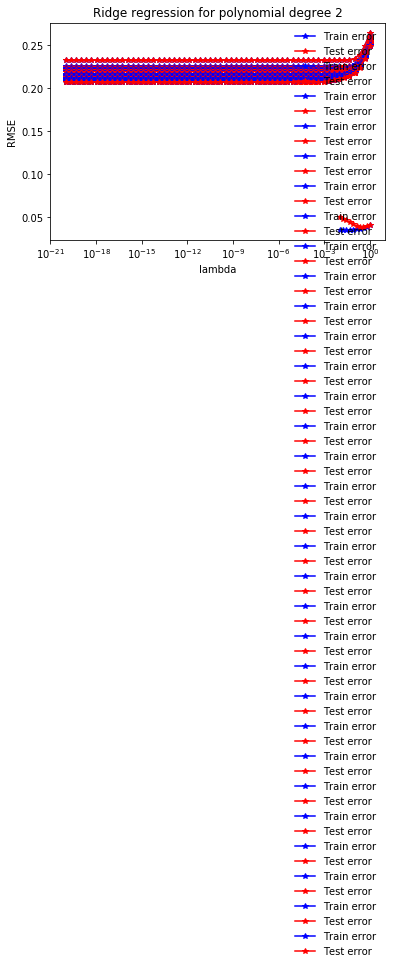

In [31]:
features_0, lambdas_0 = best_set_of_features(trx_0,y_train_0)

Best lambda = 0.01 

min feature is 197
Best lambda = 5.3556669177069077e-17 

Accuracy = 0.6663657467113748
min feature is 38
Best lambda = 1e-20 

Accuracy = 0.6770183131287079
min feature is 194
Best lambda = 1e-20 

Accuracy = 0.6818158369873614
min feature is 5
Best lambda = 0.0008895134973108182 

Accuracy = 0.685478462728914
min feature is 279
Best lambda = 0.0008895134973108182 

Accuracy = 0.6912174361619808
min feature is 240
Best lambda = 0.0008895134973108182 

Accuracy = 0.6972401341243228
min feature is 27
Best lambda = 0.0008895134973108182 

Accuracy = 0.7
min feature is 355
Best lambda = 0.0008895134973108182 

Accuracy = 0.7028888315708022
min feature is 192
Best lambda = 0.0008895134973108182 

Accuracy = 0.7042558679391282
min feature is 222
Best lambda = 0.0004075392965871761 

Accuracy = 0.7058679391281919
min feature is 182
Best lambda = 0.0004075392965871761 

Accuracy = 0.7082409079184936
min feature is 201
Best lambda = 0.0004075392965871761 

Accuracy = 0.711

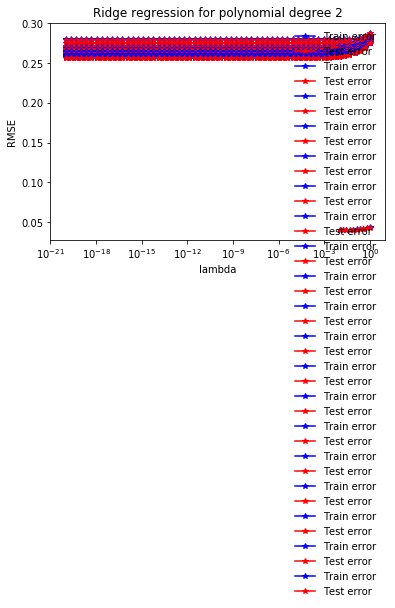

In [32]:
features_1, lambdas_1 = best_set_of_features(trx_1,y_train_1)

Best lambda = 0.01 

min feature is 340
Best lambda = 3.9194067748472134e-05 

Accuracy = 0.7068982630272952
min feature is 431
Best lambda = 1e-20 

Accuracy = 0.716545905707196
min feature is 283
Best lambda = 2.758531617629187e-14 

Accuracy = 0.7272655086848635
min feature is 314
Best lambda = 5.3556669177069077e-17 

Accuracy = 0.7339950372208437
min feature is 249
Best lambda = 1e-20 

Accuracy = 0.7395930521091811
min feature is 306
Best lambda = 0.0019414919457438817 

Accuracy = 0.7518411910669975
min feature is 252
Best lambda = 0.0042375871606040545 

Accuracy = 0.7601389578163772
min feature is 50
Best lambda = 0.0042375871606040545 

Accuracy = 0.7660744416873448
min feature is 442
Best lambda = 0.0042375871606040545 

Accuracy = 0.7687344913151364
min feature is 245
Best lambda = 0.0042375871606040545 

Accuracy = 0.7726451612903226
min feature is 38
Best lambda = 0.0042375871606040545 

Accuracy = 0.7752258064516129
min feature is 265
Best lambda = 0.0042375871606040545 

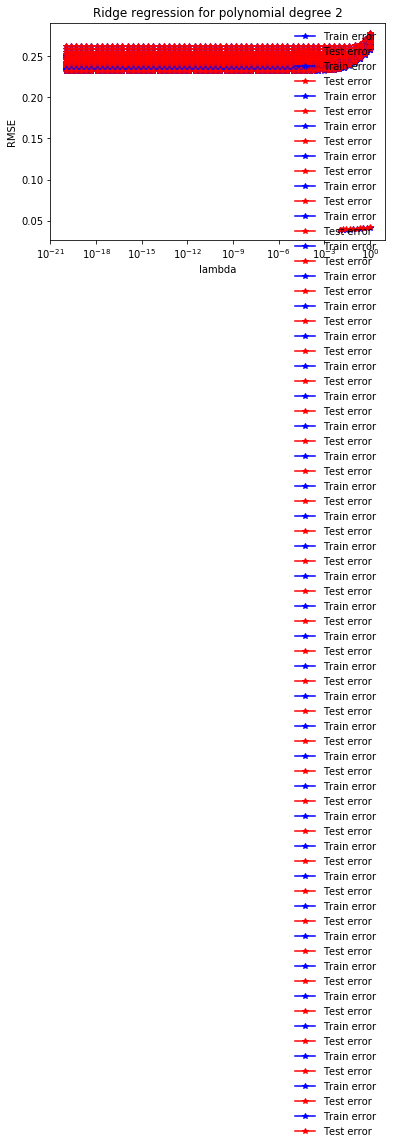

In [45]:
features_2, lambdas_2 = best_set_of_features(trx_2,y_train_2)

Best lambda = 0.01 

min feature is 340
Best lambda = 0.0019414919457438817 

Accuracy = 0.6964801444043321
min feature is 364
Best lambda = 0.009249147277217297 

Accuracy = 0.7237364620938629
min feature is 379
Best lambda = 0.009249147277217297 

Accuracy = 0.7250000000000001
min feature is 261
Best lambda = 0.009249147277217297 

Accuracy = 0.7292870036101083
min feature is 248
Best lambda = 0.009249147277217297 

Accuracy = 0.7298285198555956
min feature is 253
Best lambda = 0.009249147277217297 

Accuracy = 0.73235559566787
min feature is 28
Best lambda = 1e-20 

Accuracy = 0.7444494584837545
min feature is 247
Best lambda = 1e-20 

Accuracy = 0.7480595667870036
min feature is 277
Best lambda = 1e-20 

Accuracy = 0.7475631768953068
min feature is 327
Best lambda = 1e-20 

Accuracy = 0.7535198555956679
min feature is 52
Best lambda = 1e-20 

Accuracy = 0.7615072202166064
min feature is 377
Best lambda = 1e-20 

Accuracy = 0.764485559566787
min feature is 457
Best lambda = 1e-20 



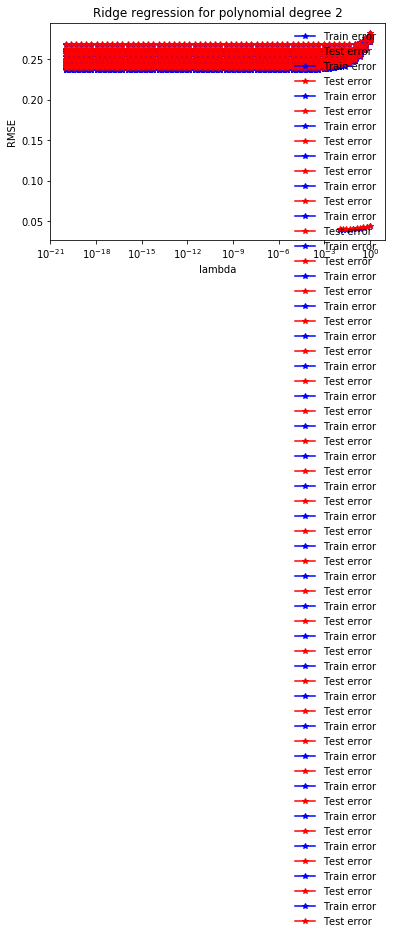

In [34]:
features_3, lambdas_3 = best_set_of_features(trx_3,y_train_3)

In [35]:
lamb_0 = lambdas_0[-3]
lamb_1 = lambdas_1[-3]
lamb_2 = lambdas_2[-3]
lamb_3 = lambdas_3[-3]

In [36]:
feat_0 = features_0[:-1]
feat_1 = features_1[:-1]
feat_2 = features_2[:-1]
feat_3 = features_3[:-1]

In [37]:
trx_fast_0 = trx_0[:,feat_0]
trx_fast_1 = trx_1[:,feat_1]
trx_fast_2 = trx_2[:,feat_2]
trx_fast_3 = trx_3[:,feat_3]

tex_fast_0 = tex_0[:,feat_0]
tex_fast_1 = tex_1[:,feat_1]
tex_fast_2 = tex_2[:,feat_2]
tex_fast_3 = tex_3[:,feat_3]

In [38]:
print(feat_0,"\n",feat_1,"\n",feat_2,"\n",feat_3)

[0, 154, 162, 18, 199, 157, 155, 281, 52, 173, 191, 249, 69, 168, 175, 171, 240, 165, 21, 188, 218, 24, 220, 278, 241, 177, 219, 38, 140, 55] 
 [190, 198, 40, 197, 9, 284, 246, 34, 363, 201, 232, 193, 213, 254, 22, 44, 234] 
 [366, 341, 433, 286, 318, 254, 312, 259, 58, 451, 255, 49, 277, 265, 29, 42, 412, 513, 231, 91, 256, 142, 96, 379, 361, 203, 35, 363, 257, 308] 
 [0, 341, 366, 382, 265, 253, 259, 35, 255, 286, 337, 63, 389, 470, 29, 531, 257, 42, 41, 646, 312, 310, 57, 355, 282, 89, 69, 343]


## Find w with selected x

In [39]:
w_best_0, _ = ridge_regression(y_train_0, trx_fast_0, lamb_0)
w_best_1, _ = ridge_regression(y_train_1, trx_fast_1, lamb_1)
w_best_2, _ = ridge_regression(y_train_2, trx_fast_2, lamb_2)
w_best_3, _ = ridge_regression(y_train_3, trx_fast_3, lamb_3)

## Prediction with the best model

Create prediction for each category

In [40]:
y_0_te = predict_labels(w_best_0,tex_fast_0)
y_1_te = predict_labels(w_best_1,tex_fast_1)
y_2_te = predict_labels(w_best_2,tex_fast_2)
y_3_te = predict_labels(w_best_3,tex_fast_3)

Reconstruct y in order

In [41]:
order_tab = np.concatenate((idx_0_te, idx_1_te, idx_2_te, idx_3_te))
order_idx = np.argsort(order_tab, axis=0)
y_unordered = np.concatenate((y_0_te, y_1_te, y_2_te, y_3_te))
y_pred = y_unordered[order_idx]

Create submission

In [42]:
create_csv_submission(ids_test, y_pred, "submission.csv")

In [43]:
def keep_features_number(feat_0, feat_1, feat_2, feat_3):
    with open('degree_9_features', 'w') as f:
        f.write("\n Cat 0")
        for item in feat_0:
            f.write("%s\n" % item)
            f.write(",")
            
        f.write("\n Cat 1")
        for item in feat_1:
            f.write("%s\n" % item)
            f.write(",")
            
        f.write("\n Cat 2")
        for item in feat_2:
            f.write("%s\n" % item)
            f.write(",")
            
        f.write("\n Cat 3")
        for item in feat_3:
            f.write("%s\n" % item)
            f.write(",")